MARKET BASKET ANALYSIS USING APRIORI ALGORITHM IN PYTHON

Importing libraries

In [1]:
pip install --upgrade mlxtend


Note: you may need to restart the kernel to use updated packages.


# Importing libraries


In [2]:
#Loading neccesary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## Reading dataset

In [3]:
#Reading Data From Web
data = pd.read_csv("C:\\Users\\05lok\\OneDrive\\Desktop\\Groceries_dataset.csv")

In [4]:
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [5]:
data.columns

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')

In [6]:
data.dtypes

Member_number       int64
Date               object
itemDescription    object
dtype: object

In [23]:
data.shape

(38765, 3)

#checking for null values

In [24]:
data.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

#for duplicate values

In [7]:


data.duplicated().any()


np.True_

In [8]:
data[data.duplicated()]

,Member_number,Date,itemDescription
5015,2051,11-09-2015,frankfurter
5022,3055,18-08-2015,other vegetables
5044,1994,11-03-2015,whole milk
5055,1682,25-06-2015,pip fruit
5059,4324,05-01-2015,sausage
...,...,...,...
38614,2027,26-02-2014,domestic eggs
38684,2936,07-03-2014,newspapers
38685,2311,13-03-2014,pot plants
38722,3834,18-05-2014,salty snack


In [9]:
data1=data.drop_duplicates()
data1.shape

(38006, 3)

In [10]:
#convert date from object to datetime
data1['Date']=pd.to_datetime(data1['Date'])
data1.sort_values('Date')

C:\Users\05lok\AppData\Local\Temp\ipykernel_19972\3252377925.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data1['Date']=pd.to_datetime(data1['Date'])
C:\Users\05lok\AppData\Local\Temp\ipykernel_19972\3252377925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Date']=pd.to_datetime(data1['Date'])


,Member_number,Date,itemDescription
35406,3681,2014-01-01,dishes
12744,1789,2014-01-01,hamburger meat
13247,2610,2014-01-01,hamburger meat
26214,1249,2014-01-01,coffee
29730,4942,2014-01-01,frozen vegetables
...,...,...,...
17347,3971,2015-12-30,bottled beer
16428,2970,2015-12-30,meat
1134,4863,2015-12-30,dessert
34960,3562,2015-12-30,rolls/buns


In [11]:
data1.Member_number.nunique()

3898

In [12]:
data1.itemDescription.nunique()

167

In [13]:
data.itemDescription.unique()

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

#DATA EXPLORATION

In [14]:
data1['itemDescription'].value_counts().head(10)

itemDescription
whole milk          2363
other vegetables    1827
rolls/buns          1646
soda                1453
yogurt              1285
root vegetables     1041
tropical fruit      1014
bottled water        908
sausage              903
citrus fruit         795
Name: count, dtype: int64

In [15]:
pd.crosstab(data1['Member_number'],data1['itemDescription'])

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,2,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
trans_data=pd.crosstab(data1['Member_number'],data1['itemDescription']).reset_index()
trans_data1=trans_data.set_index('Member_number')
trans_data1

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,2,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
item_list = data.itemDescription.unique()
item_list

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [20]:
row=trans_data1.shape[0]
column=trans_data1.shape[1]
print(row)
print(column)

3898
167


In [21]:
list_item=[]
for i in range(row):
    temp=[]
    for j in item_list:
        if trans_data.loc[i,j] >= 1 :
            temp.append(j)
    list_item.append(temp)
list_item

[['whole milk',
  'yogurt',
  'sausage',
  'pastry',
  'canned beer',
  'misc. beverages',
  'soda',
  'pickled vegetables',
  'salty snack',
  'hygiene articles',
  'semi-finished bread'],
 ['whole milk',
  'rolls/buns',
  'beef',
  'frankfurter',
  'sausage',
  'soda',
  'curd',
  'whipped/sour cream',
  'white bread'],
 ['tropical fruit',
  'whole milk',
  'other vegetables',
  'butter',
  'butter milk',
  'sugar',
  'specialty chocolate',
  'frozen vegetables'],
 ['rolls/buns',
  'sausage',
  'root vegetables',
  'frozen meals',
  'detergent',
  'dental care'],
 ['tropical fruit',
  'whole milk',
  'pip fruit',
  'other vegetables',
  'rolls/buns',
  'packaged fruit/vegetables',
  'chocolate',
  'root vegetables',
  'pastry',
  'canned beer',
  'red/blush wine',
  'shopping bags',
  'dish cleaner',
  'cling film/bags',
  'frozen fish',
  'hygiene articles'],
 ['rolls/buns', 'margarine', 'whipped/sour cream'],
 ['whole milk',
  'rolls/buns',
  'frankfurter',
  'chicken',
  'chocolat

In [22]:
trans_data1['item_list']=list_item
trans_data1.head()


C:\Users\05lok\AppData\Local\Temp\ipykernel_19972\512617213.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trans_data1['item_list']=list_item


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback,item_list
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,1,0,"[whole milk, yogurt, sausage, pastry, canned b..."
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,2,0,0,"[whole milk, rolls/buns, beef, frankfurter, sa..."
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,"[tropical fruit, whole milk, other vegetables,..."
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[rolls/buns, sausage, root vegetables, frozen ..."
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,"[tropical fruit, whole milk, pip fruit, other ..."


In [23]:
basket=trans_data1[['item_list']]
basket.head(10)

itemDescription,item_list
Member_number,
1000,"[whole milk, yogurt, sausage, pastry, canned b..."
1001,"[whole milk, rolls/buns, beef, frankfurter, sa..."
1002,"[tropical fruit, whole milk, other vegetables,..."
1003,"[rolls/buns, sausage, root vegetables, frozen ..."
1004,"[tropical fruit, whole milk, pip fruit, other ..."
1005,"[rolls/buns, margarine, whipped/sour cream]"
1006,"[whole milk, rolls/buns, frankfurter, chicken,..."
1008,"[tropical fruit, yogurt, hamburger meat, root ..."
1009,"[tropical fruit, yogurt, pastry, herbs, newspa..."


In [24]:
trans_data2=trans_data1.drop(['item_list'],axis=1)
trans_data2.head(10)

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,2,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
1005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
1008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0


In [25]:
def encode(x):
    if x < 1 :
        return 0
    else:
        return 1


basket =trans_data2.applymap(encode)
basket.head(10)


C:\Users\05lok\AppData\Local\Temp\ipykernel_19972\11877081.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket =trans_data2.applymap(encode)


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [26]:
#trying out on asample item
white_bread_data=basket.loc[basket['white bread']==1]
white_bread_data

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1023,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
1032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,1,1,0
1035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4933,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,0
4941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,0
4944,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0



#Apriori Algorithm

it is an algorithm that uses itemset to generates association rules.it is based on the concept that asubset of afrequent itemset must also be frequent itemset

In [27]:
#using apriori algorithm creating association rules for the sample item
#apply apriori slgorithm for white bread
frequent_item = apriori(white_bread_data,min_support=0.15,use_colnames=True)
frequent_item.head(10)

C:\Users\05lok\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.187861,(bottled beer)
1,0.239884,(bottled water)
2,0.182081,(brown bread)
3,0.150289,(butter)
4,0.202312,(canned beer)
5,0.213873,(citrus fruit)
6,0.153179,(domestic eggs)
7,0.150289,(frankfurter)
8,0.184971,(newspapers)
9,0.410405,(other vegetables)


In [28]:
#storting the assosiation rule into rules
white_bread_data2= association_rules(frequent_item,metric='lift',min_threshold=1,num_itemsets=len(frequent_item))
white_bread_data2

C:\Users\05lok\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(white bread),(bottled beer),1.000000,0.187861,0.187861,0.187861,1.000000,1.0,0.000000,1.000000,0.000000,0.187861,0.000000,0.593931
1,(bottled beer),(white bread),0.187861,1.000000,0.187861,1.000000,1.000000,1.0,0.000000,inf,0.000000,0.187861,0.000000,0.593931
2,(white bread),(bottled water),1.000000,0.239884,0.239884,0.239884,1.000000,1.0,0.000000,1.000000,0.000000,0.239884,0.000000,0.619942
3,(bottled water),(white bread),0.239884,1.000000,0.239884,1.000000,1.000000,1.0,0.000000,inf,0.000000,0.239884,0.000000,0.619942
4,(whole milk),(bottled water),0.537572,0.239884,0.150289,0.279570,1.165436,1.0,0.021334,1.055086,0.306971,0.239631,0.052210,0.453038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,"(white bread, whole milk)",(yogurt),0.537572,0.320809,0.184971,0.344086,1.072556,1.0,0.012513,1.035488,0.146289,0.274678,0.034271,0.460331
126,"(yogurt, whole milk)",(white bread),0.184971,1.000000,0.184971,1.000000,1.000000,1.0,0.000000,inf,0.000000,0.184971,0.000000,0.592486
127,(white bread),"(yogurt, whole milk)",1.000000,0.184971,0.184971,0.184971,1.000000,1.0,0.000000,1.000000,0.000000,0.184971,0.000000,0.592486
128,(yogurt),"(white bread, whole milk)",0.320809,0.537572,0.184971,0.576577,1.072556,1.0,0.012513,1.092117,0.099601,0.274678,0.084347,0.460331


In [29]:
#sorting the rules on lift and support
white_bread_data2.sort_values(['lift','support'],ascending=False).reset_index(drop=True)



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(yogurt),(rolls/buns),0.320809,0.424855,0.164740,0.513514,1.208678,1.0,0.028442,1.182241,0.254199,0.283582,0.154149,0.450634
1,"(white bread, yogurt)",(rolls/buns),0.320809,0.424855,0.164740,0.513514,1.208678,1.0,0.028442,1.182241,0.254199,0.283582,0.154149,0.450634
2,(yogurt),"(white bread, rolls/buns)",0.320809,0.424855,0.164740,0.513514,1.208678,1.0,0.028442,1.182241,0.254199,0.283582,0.154149,0.450634
3,(rolls/buns),(yogurt),0.424855,0.320809,0.164740,0.387755,1.208678,1.0,0.028442,1.109345,0.300185,0.283582,0.098567,0.450634
4,"(white bread, rolls/buns)",(yogurt),0.424855,0.320809,0.164740,0.387755,1.208678,1.0,0.028442,1.109345,0.300185,0.283582,0.098567,0.450634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,(frankfurter),(white bread),0.150289,1.000000,0.150289,1.000000,1.000000,1.0,0.000000,inf,0.000000,0.150289,0.000000,0.575145
126,"(whole milk, bottled water)",(white bread),0.150289,1.000000,0.150289,1.000000,1.000000,1.0,0.000000,inf,0.000000,0.150289,0.000000,0.575145
127,(white bread),"(whole milk, bottled water)",1.000000,0.150289,0.150289,0.150289,1.000000,1.0,0.000000,1.000000,0.000000,0.150289,0.000000,0.575145
128,"(whole milk, tropical fruit)",(white bread),0.150289,1.000000,0.150289,1.000000,1.000000,1.0,0.000000,inf,0.000000,0.150289,0.000000,0.575145


In [30]:
#creating a new function in which we pass an item name and it returns the item which are frequent
def frequenty_buyitem(item):
    #data of item passed
    item_data=basket.loc[basket[item]==1]
    #applying apriori on item data
    frequent_itemset = apriori(item_data,min_support=0.15,use_colnames=True)
    #sorting association rules
    rules=association_rules(frequent_itemset,metric='lift',min_threshold=1,num_itemsets=len(frequent_itemset))
    #sorting on lift and support
    rules.sort_values(['lift','support'],ascending=False).reset_index(drop=True)

    print('item frequently brought with{0}'.format(item))
    #returning top 6 item with lift & support
    return rules['consequents'].unique()[:6]

In [31]:
#example 1
frequenty_buyitem('yogurt')


item frequently brought withyogurt


C:\Users\05lok\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\05lok\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


array([frozenset({'bottled beer'}), frozenset({'yogurt'}),
       frozenset({'bottled water'}), frozenset({'butter'}),
       frozenset({'canned beer'}), frozenset({'citrus fruit'})],
      dtype=object)

In [68]:
#Example2
frequenty_buyitem('vinegar')

item frequently brought withvinegar


C:\Users\05lok\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\05lok\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


array([frozenset({'bottled water'}), frozenset({'vinegar'}),
       frozenset({'whole milk'}), frozenset({'brown bread'}),
       frozenset({'butter'}), frozenset({'citrus fruit'})], dtype=object)

In [70]:
#example3
frequenty_buyitem('domestic eggs')

item frequently brought withdomestic eggs


C:\Users\05lok\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\05lok\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


array([frozenset({'bottled beer'}), frozenset({'domestic eggs'}),
       frozenset({'bottled water'}), frozenset({'brown bread'}),
       frozenset({'canned beer'}), frozenset({'citrus fruit'})],
      dtype=object)

#validate the result

In [32]:
#yogurt is part of invoice 2222 so we will print all items from id 2222

data[data['Member_number']==2222]

,Member_number,Date,itemDescription
1631,2222,08-01-2015,yogurt
3796,2222,21-07-2015,berries
4881,2222,28-12-2015,whole milk
8433,2222,28-12-2015,sausage
10571,2222,13-02-2014,grapes
11296,2222,03-04-2014,pork
14695,2222,31-07-2014,sugar
15709,2222,21-07-2015,other vegetables
17780,2222,08-01-2015,dental care
19945,2222,21-07-2015,butter


#DATA VISUALIZATION

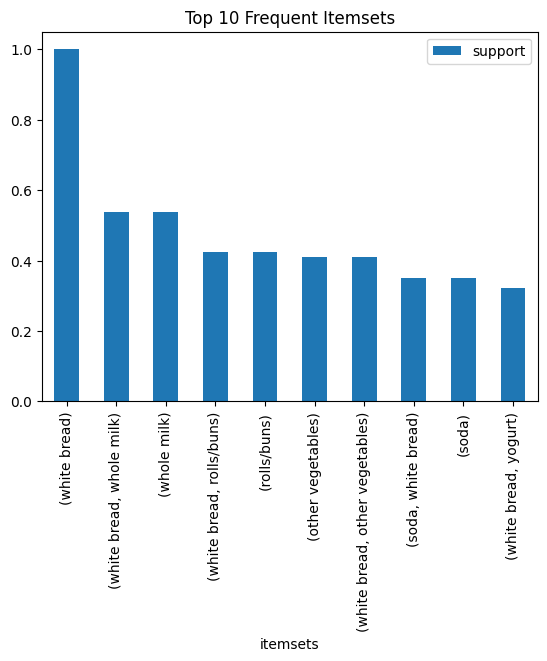

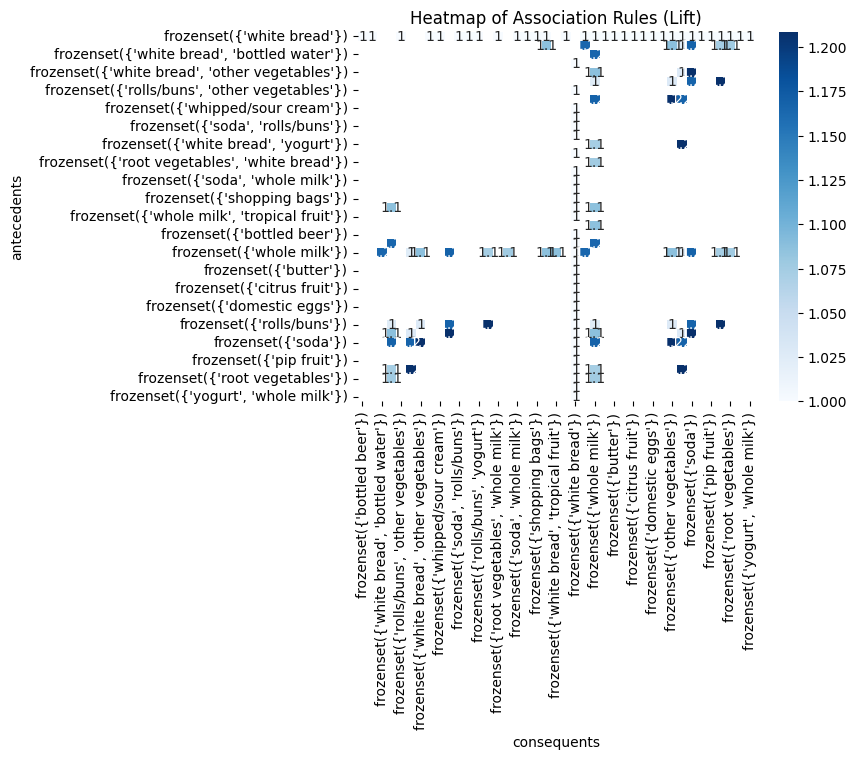

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for top 10 frequent itemsets
frequent_item.sort_values(by='support', ascending=False).head(10).plot(
    kind='bar', x='itemsets', y='support', title='Top 10 Frequent Itemsets')
plt.show()

# Heatmap for lift values
pivot = white_bread_data2.pivot(index='antecedents', columns='consequents', values='lift')
sns.heatmap(pivot, annot=True, cmap='Blues')
plt.title('Heatmap of Association Rules (Lift)')
plt.show()